# Introduction

In [130]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

*`Loading Data`*

In [131]:
# path to all the signatures data
base_dir = './signature_samples/biometrics/'

# sub directories
genuine_dir = 'genuine/'
impostor_dir = 'impostor/'
# directory with completely different word (for exercise 2)
diff_imposter_dir = 'different/'

# amount of signatures
total_signatures = 30
num_forged_signs = 30

# lists to store the signatures loaded from csv files
auth_list = []
imp_list = []
diff_list = []

# loading the signatures
for i in range(total_signatures):
    # data in form of [X, Y, Pressure, Time]
    auth_csv = pd.read_csv(base_dir + genuine_dir + '%d.csv' % (i+1))
    imp_csv = pd.read_csv(base_dir + impostor_dir + '%d.csv' % (i+1))
    diff_csv = pd.read_csv(base_dir + diff_imposter_dir + '%d.csv' % (i+1))

    auth_list.append(auth_csv.values)
    imp_list.append(imp_csv.values)
    diff_list.append(diff_csv.values)

# Training the GMM (Gaussian Mixture Model)

*`(Number of training signatures, Number of gaussian mixture components)`*
    
*Pair 1* - (18, 20)
   
*Pair 2* - (24, 20)

*Pair 3* - (18, 40)

*Pair 4* - (24, 40)

In [132]:
# number of signatures used in training the models 
num_train_sigs_1 = 18
num_train_sigs_2 = 24

# number of gaussian mixture components in GMM
num_gm_comp_1 = 20
num_gm_comp_2 = 40

In [133]:
# creating training sets
train_set_1 = np.reshape(auth_list[0], (-1,4))
train_set_2 = np.reshape(auth_list[0], (-1,4))

for i in range(1, num_train_sigs_1):
    sample = np.reshape(auth_list[i], (-1,4))
    train_set_1 = np.concatenate((train_set_1, sample), axis=0)

for i in range(1, num_train_sigs_2):
    sample = np.reshape(auth_list[i], (-1,4))
    train_set_2 = np.concatenate((train_set_2, sample), axis=0)

In [134]:
# Training the Gaussian Mixture Model from Scikit-learn library

# (18, 20)
gmm_pair_1 = GaussianMixture(n_components=num_gm_comp_1).fit(train_set_1)
# (24, 20)
gmm_pair_2 = GaussianMixture(n_components=num_gm_comp_1).fit(train_set_2)
# (18, 40)
gmm_pair_3 = GaussianMixture(n_components=num_gm_comp_2).fit(train_set_1)
# (24, 40)
gmm_pair_4 = GaussianMixture(n_components=num_gm_comp_2).fit(train_set_2)


# Exercise 1

<h3>For pair 1 - (18, 20) </h3>

<h4>Finding Mean and Std for genuine and impostor sets using gmm trained on pair 1</h4>

In [135]:
aScores_p1 = []
fScores_p1 = []

for i in range(num_train_sigs_1, total_signatures):
    sample = np.reshape(auth_list[i], (-1,4))
    score = gmm_pair_1.score(sample)
    aScores_p1.append(score)

for j in range(num_forged_signs):
    samplef = np.reshape(imp_list[j], (-1,4))
    scoref = gmm_pair_1.score(samplef)
    fScores_p1.append(scoref)

# authentic set
aMu_p1 = np.mean(aScores_p1)
aStd_p1 = np.std(aScores_p1)

# forged set
fMu_p1 = np.mean(fScores_p1)
fStd_p1 = np.std(fScores_p1)

<h4> Probability Density Function (PDF)  for authentic and forged data </h4>

*`Both plots together, followed by seperated plots for both sets`*

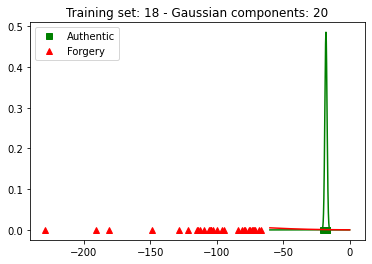

In [136]:
x = np.arange(-60, 0, 0.01)

aProb_p1 = norm.pdf(x, loc=aMu_p1, scale=aStd_p1)
fProb_p1 = norm.pdf(x, loc=fMu_p1, scale=fStd_p1)

plt.plot(x, aProb_p1, 'g')
plt.plot(aScores_p1, np.zeros(len(aScores_p1)), 'gs', lw=2, label='Authentic')

plt.plot(x, fProb_p1, 'r')
plt.plot(fScores_p1, np.zeros(len(fScores_p1)), 'r^', lw=2, label='Forgery')
plt.legend();

plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_1));

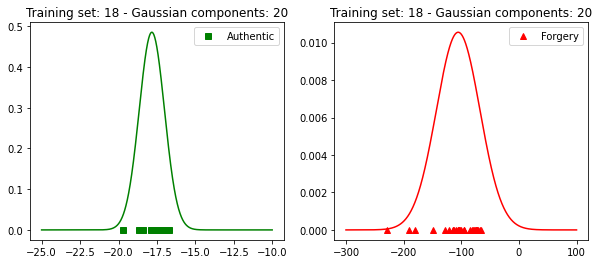

In [137]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-25, -10, 0.01)
aProb_p1 = norm.pdf(x, loc=aMu_p1, scale=aStd_p1)

plt.subplot(1,2,1)
plt.plot(x, aProb_p1, 'g')
plt.plot(aScores_p1, np.zeros(len(aScores_p1)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_1));


# Forged (impostor) set
x = np.arange(-300, 100, 0.01)
fProb_p1 = norm.pdf(x, loc=fMu_p1, scale=fStd_p1)

plt.subplot(1,2,2)
plt.plot(x, fProb_p1, 'r')
plt.plot(fScores_p1, np.zeros(len(fScores_p1)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_1));

<h3>For pair 2 - (24, 20) </h3>

<h4>Finding Mean and Std for genuine and impostor sets using gmm trained on pair 2</h4>

In [138]:
aScores_p2 = []
fScores_p2 = []

for i in range(num_train_sigs_2, total_signatures):
    sample = np.reshape(auth_list[i], (-1,4))
    score = gmm_pair_2.score(sample)
    aScores_p2.append(score)

for j in range(num_forged_signs):
    samplef = np.reshape(imp_list[j], (-1,4))
    scoref = gmm_pair_2.score(samplef)
    fScores_p2.append(scoref)

# authentic set
aMu_p2 = np.mean(aScores_p2)
aStd_p2 = np.std(aScores_p2)

# forged set
fMu_p2 = np.mean(fScores_p2)
fStd_p2 = np.std(fScores_p2)

<h4> Probability Density Function (PDF)  for authentic and forged data </h4>

*`Both plots together, followed by seperated plots for both sets`*

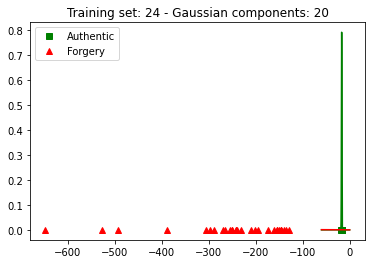

In [139]:
x = np.arange(-60, 0, 0.01)

aProb_p2 = norm.pdf(x, loc=aMu_p2, scale=aStd_p2)
fProb_p2 = norm.pdf(x, loc=fMu_p2, scale=fStd_p2)

plt.plot(x, aProb_p2, 'g')
plt.plot(aScores_p2, np.zeros(len(aScores_p2)), 'gs', lw=2, label='Authentic')

plt.plot(x, fProb_p2, 'r')
plt.plot(fScores_p2, np.zeros(len(fScores_p2)), 'r^', lw=2, label='Forgery')
plt.legend();

plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_1));

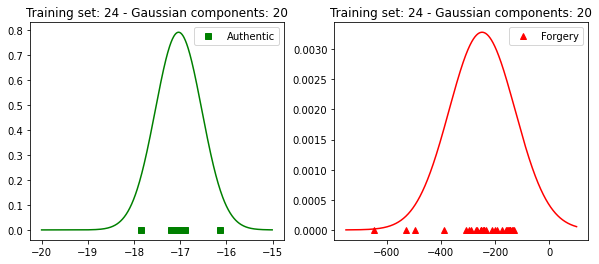

In [162]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -15, 0.01)
aProb_p2 = norm.pdf(x, loc=aMu_p2, scale=aStd_p2)

plt.subplot(1,2,1)
plt.plot(x, aProb_p2, 'g')
plt.plot(aScores_p2, np.zeros(len(aScores_p2)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_1));


# Forged (impostor) set
x = np.arange(-750, 100, 0.01)
fProb_p2 = norm.pdf(x, loc=fMu_p2, scale=fStd_p2)

plt.subplot(1,2,2)
plt.plot(x, fProb_p2, 'r')
plt.plot(fScores_p2, np.zeros(len(fScores_p2)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_1));

<h3>For pair 3 - (18, 40) </h3>

<h4>Finding Mean and Std for genuine and impostor sets using gmm trained on pair 3</h4>

In [141]:
aScores_p3 = []
fScores_p3 = []

for i in range(num_train_sigs_1, total_signatures):
    sample = np.reshape(auth_list[i], (-1,4))
    score = gmm_pair_3.score(sample)
    aScores_p3.append(score)

for j in range(num_forged_signs):
    samplef = np.reshape(imp_list[j], (-1,4))
    scoref = gmm_pair_3.score(samplef)
    fScores_p3.append(scoref)

# authentic set
aMu_p3 = np.mean(aScores_p3)
aStd_p3 = np.std(aScores_p3)

# forged set
fMu_p3 = np.mean(fScores_p3)
fStd_p3 = np.std(fScores_p3)

<h4> Probability Density Function (PDF)  for authentic and forged data </h4>

*`Both plots together, followed by seperated plots for both sets`*

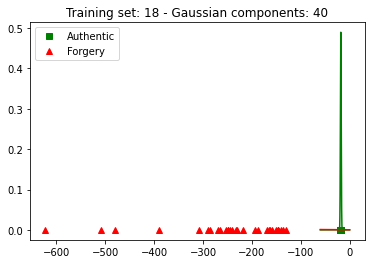

In [142]:
x = np.arange(-60, 0, 0.01)

aProb_p3 = norm.pdf(x, loc=aMu_p3, scale=aStd_p3)
fProb_p3 = norm.pdf(x, loc=fMu_p3, scale=fStd_p3)

plt.plot(x, aProb_p3, 'g')
plt.plot(aScores_p3, np.zeros(len(aScores_p3)), 'gs', lw=2, label='Authentic')

plt.plot(x, fProb_p3, 'r')
plt.plot(fScores_p3, np.zeros(len(fScores_p3)), 'r^', lw=2, label='Forgery')
plt.legend();

plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_2));

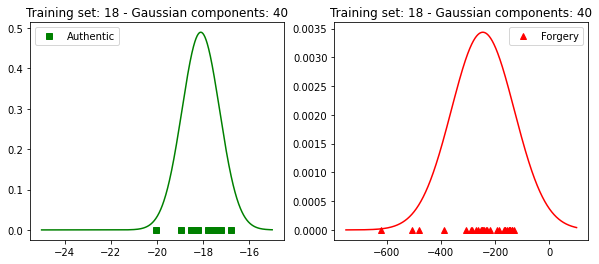

In [163]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-25, -15, 0.01)
aProb_p3 = norm.pdf(x, loc=aMu_p3, scale=aStd_p3)

plt.subplot(1,2,1)
plt.plot(x, aProb_p3, 'g')
plt.plot(aScores_p3, np.zeros(len(aScores_p3)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_2));


# Forged (impostor) set
x = np.arange(-750, 100, 0.01)
fProb_p3 = norm.pdf(x, loc=fMu_p3, scale=fStd_p3)

plt.subplot(1,2,2)
plt.plot(x, fProb_p3, 'r')
plt.plot(fScores_p3, np.zeros(len(fScores_p3)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_2));

<h3>For pair 4 - (20, 40) </h3>

<h4>Finding Mean and Std for genuine and impostor sets using gmm trained on pair 4</h4>

In [144]:
aScores_p4 = []
fScores_p4 = []

for i in range(num_train_sigs_2, total_signatures):
    sample = np.reshape(auth_list[i], (-1,4))
    score = gmm_pair_4.score(sample)
    aScores_p4.append(score)

for j in range(num_forged_signs):
    samplef = np.reshape(imp_list[j], (-1,4))
    scoref = gmm_pair_4.score(samplef)
    fScores_p4.append(scoref)

# authentic set
aMu_p4 = np.mean(aScores_p4)
aStd_p4 = np.std(aScores_p4)

# forged set
fMu_p4 = np.mean(fScores_p4)
fStd_p4 = np.std(fScores_p4)

<h4> Probability Density Function (PDF)  for authentic and forged data </h4>

*`Both plots together, followed by seperated plots for both sets`*

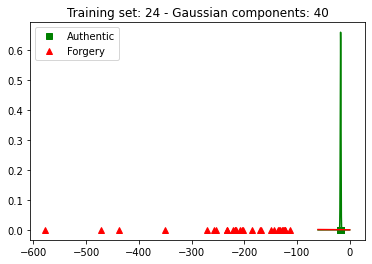

In [145]:
x = np.arange(-60, 0, 0.01)

aProb_p4 = norm.pdf(x, loc=aMu_p4, scale=aStd_p4)
fProb_p4 = norm.pdf(x, loc=fMu_p4, scale=fStd_p4)

plt.plot(x, aProb_p4, 'g')
plt.plot(aScores_p4, np.zeros(len(aScores_p4)), 'gs', lw=2, label='Authentic')

plt.plot(x, fProb_p4, 'r')
plt.plot(fScores_p4, np.zeros(len(fScores_p4)), 'r^', lw=2, label='Forgery')
plt.legend();

plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_2));

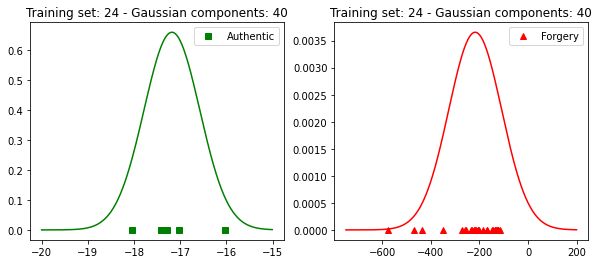

In [164]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -15, 0.01)
aProb_p4 = norm.pdf(x, loc=aMu_p4, scale=aStd_p4)

plt.subplot(1,2,1)
plt.plot(x, aProb_p4, 'g')
plt.plot(aScores_p4, np.zeros(len(aScores_p4)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_2));


# Forged (impostor) set
x = np.arange(-750, 200, 0.01)
fProb_p4 = norm.pdf(x, loc=fMu_p4, scale=fStd_p4)

plt.subplot(1,2,2)
plt.plot(x, fProb_p4, 'r')
plt.plot(fScores_p4, np.zeros(len(fScores_p4)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_2));

In [165]:
print("Mean and standard deviations of pair 1 for both signatures")
print("Authentic :  ",aMu_p1," , ",aStd_p1)
print("Impostor :  ",fMu_p1," , ",fStd_p1)
print()

print("Mean and standard deviations of pair 2 for both signatures")
print("Authentic :  ",aMu_p2," , ",aStd_p2)
print("Impostor :  ",fMu_p2," , ",fStd_p2)
print()

print("Mean and standard deviations of pair 3 for both signatures")
print("Authentic :  ",aMu_p3," , ",aStd_p3)
print("Impostor :  ",fMu_p3," , ",fStd_p3)
print()

print("Mean and standard deviations of pair 4 for both signatures")
print("Authentic :  ",aMu_p4," , ",aStd_p4)
print("Impostor :  ",fMu_p4," , ",fStd_p4)
print()

Mean and standard deviations of pair 1 for both signatures
Authentic :   -17.83351807534331  ,  0.8221160067898651
Impostor :   -105.35911759640196  ,  37.79586402117586

Mean and standard deviations of pair 2 for both signatures
Authentic :   -17.035840077769137  ,  0.5033623822387221
Impostor :   -248.19275444567452  ,  121.57950106282347

Mean and standard deviations of pair 3 for both signatures
Authentic :   -18.103938931368923  ,  0.8152711802841958
Impostor :   -245.54925016910965  ,  116.0678210096577

Mean and standard deviations of pair 4 for both signatures
Authentic :   -17.180516130662124  ,  0.6038090556778148
Impostor :   -217.58084346603027  ,  109.18569700735198



On increasing the number of signature samples used for training, we see that the difference between the mean and standard deviations of the genuine and impostor signatures increased significantly as it becomes more accurate in determining the impostor signatures apart from authentic signatures, therefore their graphs became more distinct. We see the similar change when we change the number of Gaussian mixture components for any given (same) number of training sample where it becomes more accurate in distinguishing the impostor signature from authentic signatures.

# Exercise 2
<h3>Using the same Gaussian Mixture model and aScores from the 4 pairs</h3>

<h4>Finding Mean and Std for genuine and second impostor sets using gmm trained on pair 1</h4>

In [148]:
dScores_p1 = []
for j in range(num_forged_signs):
    sample_diff = np.reshape(diff_list[j], (-1,4))
    score_diff = gmm_pair_1.score(sample_diff)
    dScores_p1.append(score_diff)
    
# other impostor set
dMu_p1 = np.mean(dScores_p1)
dStd_p1 = np.std(dScores_p1)

print("Mean and standard deviations of pair 1 for both signatures")
print("Authentic :  ",aMu_p1," , ",aStd_p1)
print("Other Impostor :  ",dMu_p1," , ",dStd_p1)

Mean and standard deviations of pair 1 for both signatures
Authentic :   -17.83351807534331  ,  0.8221160067898651
Other Impostor :   -19.452696226594295  ,  1.5874612909955794


<h4> Probability Density Function (PDF)  for authentic and other impostor data </h4>

*`Both plots together, followed by seperated plots for both sets`*

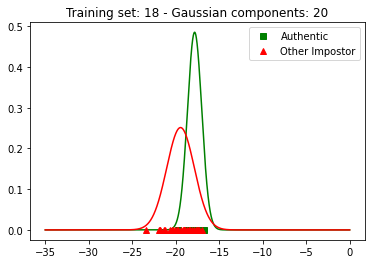

In [166]:
x = np.arange(-35, 0, 0.01)

aProb_p1 = norm.pdf(x, loc=aMu_p1, scale=aStd_p1)
dProb_p1 = norm.pdf(x, loc=dMu_p1, scale=dStd_p1)

plt.plot(x, aProb_p1, 'g')
plt.plot(aScores_p1, np.zeros(len(aScores_p1)), 'gs', lw=2, label='Authentic')

plt.plot(x, dProb_p1, 'r')
plt.plot(dScores_p1, np.zeros(len(dScores_p1)), 'r^', lw=2, label='Other Impostor')
plt.legend();

plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_1));

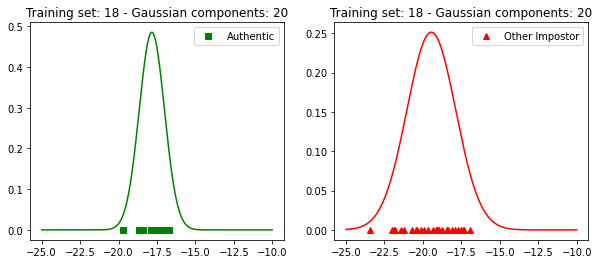

In [167]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-25, -10, 0.01)
aProb_p1 = norm.pdf(x, loc=aMu_p1, scale=aStd_p1)

plt.subplot(1,2,1)
plt.plot(x, aProb_p1, 'g')
plt.plot(aScores_p1, np.zeros(len(aScores_p1)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_1));


# other impostor set
x = np.arange(-25, -10, 0.01)
dProb_p1 = norm.pdf(x, loc=dMu_p1, scale=dStd_p1)

plt.subplot(1,2,2)
plt.plot(x, dProb_p1, 'r')
plt.plot(dScores_p1, np.zeros(len(dScores_p1)), 'r^', lw=2, label='Other Impostor')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_1));

<h3>For pair 2 - (24, 20) </h3>

<h4>Finding Mean and Std for genuine and other impostor sets using gmm trained on pair 2</h4>

In [151]:
dScores_p2 = []

for j in range(num_forged_signs):
    sample_diff = np.reshape(diff_list[j], (-1,4))
    score_diff = gmm_pair_2.score(sample_diff)
    dScores_p2.append(score_diff)
    
# other impostor set
dMu_p2 = np.mean(dScores_p2)
dStd_p2 = np.std(dScores_p2)
print("Mean and standard deviations of pair 2 for both signatures")
print("Authentic :  ",aMu_p2," , ",aStd_p2)
print("Other Impostor :  ",dMu_p2," , ",dStd_p2)

Mean and standard deviations of pair 2 for both signatures
Authentic :   -17.035840077769137  ,  0.5033623822387221
Other Impostor :   -18.446440656585715  ,  1.1347731542736241


<h4> Probability Density Function (PDF)  for authentic and forged data </h4>

*`Both plots together, followed by seperated plots for both sets`*

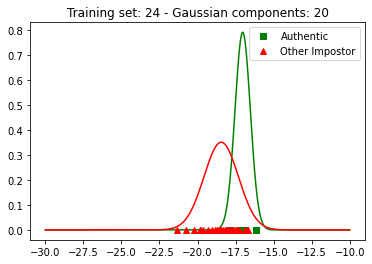

In [169]:
x = np.arange(-30, -10, 0.01)

aProb_p2 = norm.pdf(x, loc=aMu_p2, scale=aStd_p2)
dProb_p2 = norm.pdf(x, loc=dMu_p2, scale=dStd_p2)

plt.plot(x, aProb_p2, 'g')
plt.plot(aScores_p2, np.zeros(len(aScores_p2)), 'gs', lw=2, label='Authentic')

plt.plot(x, dProb_p2, 'r')
plt.plot(dScores_p2, np.zeros(len(dScores_p2)), 'r^', lw=2, label='Other Impostor')
plt.legend();

plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_1));

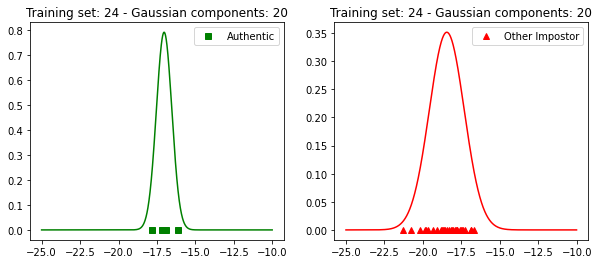

In [170]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-25, -10, 0.01)
aProb_p2 = norm.pdf(x, loc=aMu_p2, scale=aStd_p2)

plt.subplot(1,2,1)
plt.plot(x, aProb_p2, 'g')
plt.plot(aScores_p2, np.zeros(len(aScores_p2)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_1));


# other impostor set
dProb_p2 = norm.pdf(x, loc=dMu_p2, scale=dStd_p2)

plt.subplot(1,2,2)
plt.plot(x, dProb_p2, 'r')
plt.plot(dScores_p2, np.zeros(len(dScores_p2)), 'r^', lw=2, label='Other Impostor')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_1));

<h3>For pair 3 - (18, 40) </h3>

<h4>Finding Mean and Std for genuine and impostor sets using gmm trained on pair 3</h4>

In [154]:
dScores_p3 = []

for j in range(num_forged_signs):
    sample_diff = np.reshape(diff_list[j], (-1,4))
    score_diff = gmm_pair_3.score(sample_diff)
    dScores_p3.append(score_diff)

# other impostor set
dMu_p3 = np.mean(dScores_p3)
dStd_p3 = np.std(dScores_p3)
print("Mean and standard deviations of pair 3 for both signatures")
print("Authentic :  ",aMu_p3," , ",aStd_p3)
print("Other Impostor :  ",dMu_p3," , ",dStd_p3)

Mean and standard deviations of pair 3 for both signatures
Authentic :   -18.103938931368923  ,  0.8152711802841958
Other Impostor :   -20.134929413563462  ,  1.789161110595617


<h4> Probability Density Function (PDF)  for authentic and forged data </h4>

*`Both plots together, followed by seperated plots for both sets`*

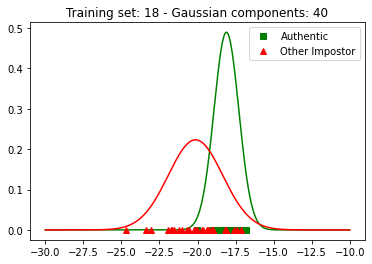

In [171]:
x = np.arange(-30, -10, 0.01)

aProb_p3 = norm.pdf(x, loc=aMu_p3, scale=aStd_p3)
dProb_p3 = norm.pdf(x, loc=dMu_p3, scale=dStd_p3)

plt.plot(x, aProb_p3, 'g')
plt.plot(aScores_p3, np.zeros(len(aScores_p3)), 'gs', lw=2, label='Authentic')

plt.plot(x, dProb_p3, 'r')
plt.plot(dScores_p3, np.zeros(len(dScores_p3)), 'r^', lw=2, label='Other Impostor')
plt.legend();

plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_2));

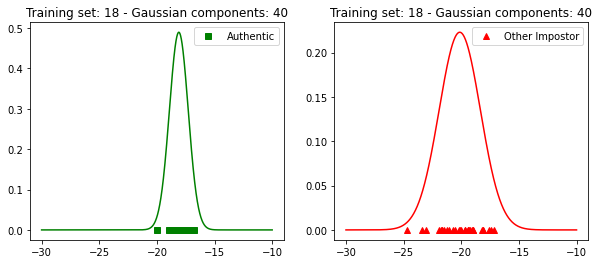

In [173]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-30, -10, 0.01)
aProb_p3 = norm.pdf(x, loc=aMu_p3, scale=aStd_p3)

plt.subplot(1,2,1)
plt.plot(x, aProb_p3, 'g')
plt.plot(aScores_p3, np.zeros(len(aScores_p3)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_2));


# other impostor set
dProb_p3 = norm.pdf(x, loc=dMu_p3, scale=dStd_p3)

plt.subplot(1,2,2)
plt.plot(x, dProb_p3, 'r')
plt.plot(dScores_p3, np.zeros(len(dScores_p3)), 'r^', lw=2, label='Other Impostor')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_1, num_gm_comp_2));

<h3>For pair 4 - (20, 40) </h3>

<h4>Finding Mean and Std for genuine and impostor sets using gmm trained on pair 4</h4>

In [157]:
dScores_p4 = []

for j in range(num_forged_signs):
    sample_diff = np.reshape(diff_list[j], (-1,4))
    score_diff = gmm_pair_4.score(sample_diff)
    dScores_p4.append(score_diff)

# other impostor set
dMu_p4 = np.mean(dScores_p4)
dStd_p4 = np.std(dScores_p4)
print("Mean and standard deviations of pair 4 for both signatures")
print("Authentic :  ",aMu_p4," , ",aStd_p4)
print("Other Impostor :  ",dMu_p4," , ",dStd_p4)

Mean and standard deviations of pair 4 for both signatures
Authentic :   -17.180516130662124  ,  0.6038090556778148
Other Impostor :   -18.8904569944148  ,  1.3340381223244584


<h4> Probability Density Function (PDF)  for authentic and forged data </h4>

*`Both plots together, followed by seperated plots for both sets`*

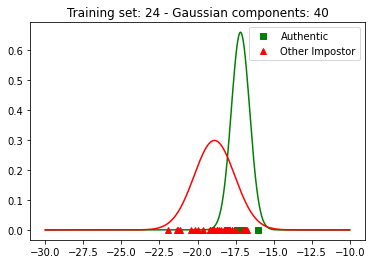

In [174]:
x = np.arange(-30, -10, 0.01)

aProb_p4 = norm.pdf(x, loc=aMu_p4, scale=aStd_p4)
dProb_p4 = norm.pdf(x, loc=dMu_p4, scale=dStd_p4)

plt.plot(x, aProb_p4, 'g')
plt.plot(aScores_p4, np.zeros(len(aScores_p4)), 'gs', lw=2, label='Authentic')

plt.plot(x, dProb_p4, 'r')
plt.plot(dScores_p4, np.zeros(len(dScores_p4)), 'r^', lw=2, label='Other Impostor')
plt.legend();

plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_2));

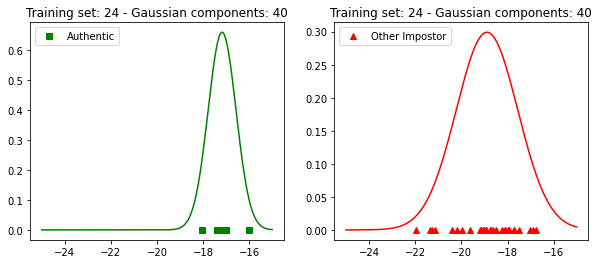

In [175]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-25, -15, 0.01)
aProb_p4 = norm.pdf(x, loc=aMu_p4, scale=aStd_p4)

plt.subplot(1,2,1)
plt.plot(x, aProb_p4, 'g')
plt.plot(aScores_p4, np.zeros(len(aScores_p4)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_2));


# other impostor set
dProb_p4 = norm.pdf(x, loc=dMu_p4, scale=dStd_p4)

plt.subplot(1,2,2)
plt.plot(x, dProb_p4, 'r')
plt.plot(dScores_p4, np.zeros(len(dScores_p4)), 'r^', lw=2, label='Other Impostor')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(num_train_sigs_2, num_gm_comp_2));

<h2> Comparison of results of Exercise 1 and 2</h2>

In [160]:
print("Mean and standard deviations of pair 1 for all three types of signatures")
print("Authentic :  ",aMu_p1," , ",aStd_p1)
print("Impostor :  ",fMu_p1," , ",fStd_p1)
print("Other Impostor :  ",dMu_p1," , ",dStd_p1,"\n")

print("Mean and standard deviations of pair 2 for all three types of signatures")
print("Authentic :  ",aMu_p2," , ",aStd_p2)
print("Impostor :  ",fMu_p2," , ",fStd_p2)
print("Other Impostor :  ",dMu_p2," , ",dStd_p2,"\n")


print("Mean and standard deviations of pair 3 for all three types of signatures")
print("Authentic :  ",aMu_p3," , ",aStd_p3)
print("Impostor :  ",fMu_p3," , ",fStd_p3)
print("Other Impostor :  ",dMu_p3," , ",dStd_p3,"\n")


print("Mean and standard deviations of pair 4 for all three types of signatures")
print("Authentic :  ",aMu_p4," , ",aStd_p4)
print("Impostor :  ",fMu_p4," , ",fStd_p4)
print("Other Impostor :  ",dMu_p4," , ",dStd_p4)

Mean and standard deviations of pair 1 for all three types of signatures
Authentic :   -17.83351807534331  ,  0.8221160067898651
Impostor :   -105.35911759640196  ,  37.79586402117586
Other Impostor :   -19.452696226594295  ,  1.5874612909955794 

Mean and standard deviations of pair 2 for all three types of signatures
Authentic :   -17.035840077769137  ,  0.5033623822387221
Impostor :   -248.19275444567452  ,  121.57950106282347
Other Impostor :   -18.446440656585715  ,  1.1347731542736241 

Mean and standard deviations of pair 3 for all three types of signatures
Authentic :   -18.103938931368923  ,  0.8152711802841958
Impostor :   -245.54925016910965  ,  116.0678210096577
Other Impostor :   -20.134929413563462  ,  1.789161110595617 

Mean and standard deviations of pair 4 for all three types of signatures
Authentic :   -17.180516130662124  ,  0.6038090556778148
Impostor :   -217.58084346603027  ,  109.18569700735198
Other Impostor :   -18.8904569944148  ,  1.3340381223244584


On comparison of results of Exercise 1 and 2, we can see that the difference between the genuine and imposter signatures is much greater than the difference between the mean and standard deviations of genuine and the other impostor signature in Exercise 2. Due to this we can see that in Exercise 1, the normal distributions are pretty well separated while in Exercise 2 the normal distributions overlap a little bit.

# Exercise 3

*`Note: This values might be different everytime the code is ran as mean and standard deviation changes`*

![page_1](page_1.jpg)

![page_2](page_2.jpg)

<h3>
FRR = 0.0588 = 5.8%

FAR = 0
</h3>

*We calculated the FRR and FAR with our first data unfortunately right before submission, we decided to check our code and this changed all of our mean and standard deviation. Due to insufficient time, however, we couldn't update our calculations.*

# Conculsion

The purpose of this laboratory exercise is to learn handling and processing the acquired biometric data such as authentic (genuine) and forged (impostor) signatures of one individual, and preparing this data for usage in 1:1 matching. On comparison of results of Exercise 1 and 2, we can see that the difference between the genuine and imposter signatures is much greater than the difference between the mean and standard deviations of genuine and the other impostor signature in Exercise 2.